In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/'
anndata_objects = []
name_anndata = "A1-1"+"/"+"anndataNucA11"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "A1-2"+"/"+"anndataNucA12"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "C2"+"/"+"anndataNucC2"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "D2-1"+"/"+"anndataNucD21"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "PS"+"/"+"ps_slice"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
samples = ["A1-1", "A1-2", "C2", "D2-1", "PS"]

In [7]:
anndata_samples_together = anndata_objects[0].concatenate(anndata_objects[1],anndata_objects[2],anndata_objects[3],anndata_objects[4])
print(anndata.obs[annotation].value_counts())

Hepa            40632
LSEC             7317
Kupf             6502
Stel             4133
Oth im           2368
Unknown          2336
Chol             1787
B cell           1757
Portal vein      1431
Fibr              921
Central vein      915
Meso              745
Portal LAM        580
Name: annotation_own_score_genes_BasicMartin_12, dtype: int64


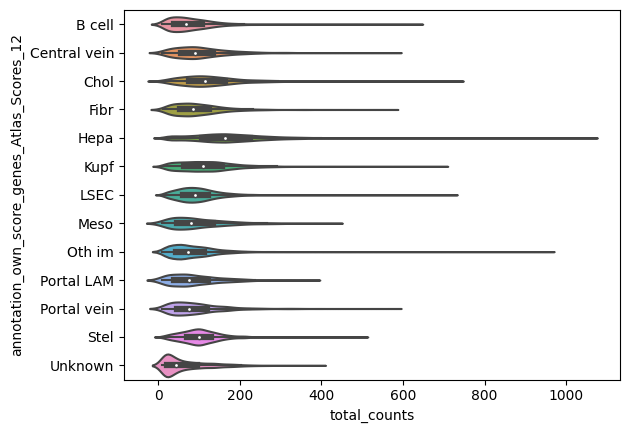

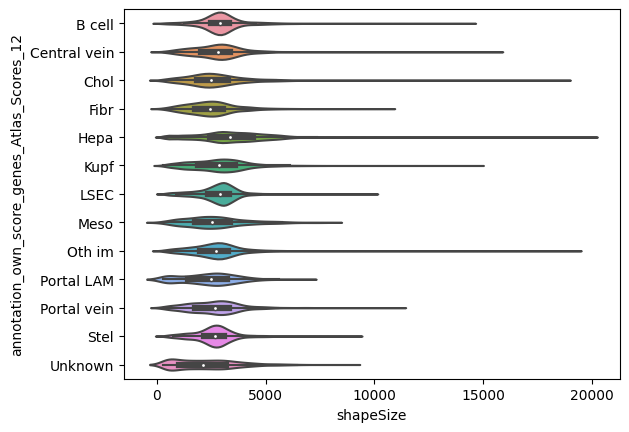

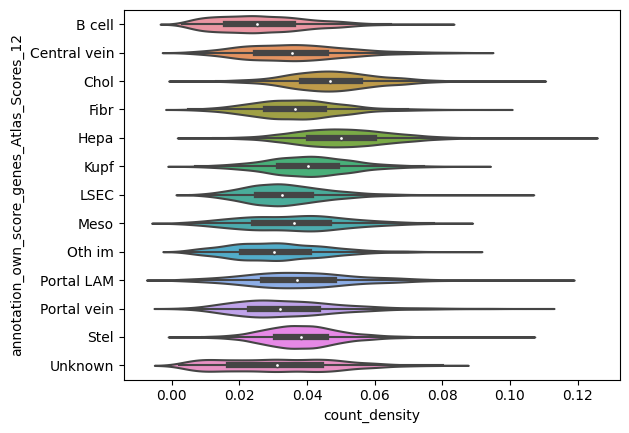

In [19]:
anndata = anndata_samples_together
annotation = 'annotation_own_score_genes_Atlas_Scores_12'
sns.violinplot(data=anndata.obs,x="total_counts",y=annotation)
plt.show()
sns.violinplot(data=anndata.obs,x="shapeSize",y=annotation)
plt.show()
anndata.obs['count_density'] = anndata.obs['total_counts'] / anndata.obs['shapeSize']
sns.violinplot(data=anndata.obs,x="count_density",y=annotation)
plt.show()

In [10]:
annotation1 = 'annotation_score_genes_original_Atlas_Scores_12'
annotation2 = 'annotation_own_score_genes_Atlas_Scores_12'
# drop first 11 characters
annotation1_scores = annotation1[11:]
annotation2_scores = annotation2[11:]

In [11]:
anndata = anndata_objects[4]
anndata.uns[annotation2_scores]

,LSEC,Portal LAM,Central vein,Portal vein,Hepa,Chol,B cell,Kupf,Meso,Stel,Fibr,Oth im
0,-0.412128,-0.356687,-0.513887,-0.523997,-0.253827,-0.467970,-0.439520,-0.270245,2.445689,-0.381887,-0.355142,-0.419121
1,-0.457329,-0.342683,-0.513887,-0.523997,0.518472,-0.426762,-0.439520,-0.251373,-0.321882,-0.422217,-0.505418,-0.419121
2,-0.457329,-0.326337,-0.513887,-0.508930,0.363569,-0.224733,-0.439520,-0.243444,-0.321882,-0.402214,-0.482290,-0.419121
3,-0.431950,-0.290431,-0.456425,-0.461410,1.899900,-0.210637,-0.439520,-0.059271,-0.321882,-0.400989,-0.480873,-0.307291
4,-0.457329,-0.347902,-0.513887,-0.523997,0.244539,-0.367945,-0.439520,-0.264608,-0.321882,-0.428603,-0.512802,-0.419121
...,...,...,...,...,...,...,...,...,...,...,...,...
11789,0.484860,-0.303425,-0.349578,-0.413349,-0.216574,-0.390748,-0.305017,-0.273784,-0.283712,0.178282,0.117237,-0.275739
11790,0.976746,-0.179076,1.793332,5.398909,-0.309410,-0.256062,-0.098467,-0.283678,-0.321882,-0.436044,-0.521405,0.141259
11791,-0.457329,-0.356687,-0.513887,-0.523997,-0.317179,-0.467970,-0.439520,-0.283678,-0.070365,-0.397253,0.717851,-0.419121
11792,-0.433780,-0.348107,-0.513887,-0.523997,0.054872,-0.394039,-0.439520,0.378865,0.711671,1.511771,3.735958,-0.419121


In [12]:
corr_matrices = []
for anndata in anndata_objects:
    scores = anndata.uns[annotation1_scores]
    corr_matrix = scores.corr(method='pearson')
    corr_matrices.append(corr_matrix)   
    print(scores) 
    break
# average df in corr_matrices
average_corr_matrix = sum(corr_matrices)/len(corr_matrices)
average_corr_matrix

           LSEC  Portal LAM  Central vein  Portal vein      Hepa      Chol  \
cells                                                                        
65    -0.017974   -0.045549     -0.004997    -0.011015  0.075684 -0.036748   
66    -0.022729   -0.010566     -0.045172     0.009043  0.034047 -0.020191   
67    -0.022953   -0.017469     -0.016605     0.000584  0.073234 -0.008170   
129   -0.008349   -0.015283     -0.002968     0.002857  0.022468 -0.012211   
130   -0.055013   -0.013597     -0.067704    -0.026700  0.040451 -0.019802   
...         ...         ...           ...          ...       ...       ...   
32713 -0.034542   -0.017656     -0.013610    -0.083406 -0.042963 -0.044658   
32777 -0.035023    0.046865      0.000000    -0.010775  0.222282  0.060657   
32841 -0.034832   -0.007046     -0.013991    -0.078329 -0.079150 -0.045505   
32905  0.028074    0.020895      0.001021    -0.012657  0.019439  0.018164   
32969 -0.024935   -0.005885      0.002792    -0.004878  0.219388

,LSEC,Portal LAM,Central vein,Portal vein,Hepa,Chol,B cell,Kupf,Meso,Stel,Fibr,Oth im
LSEC,1.000000,-0.288565,0.474298,0.219314,-0.386473,-0.297383,0.558677,0.269030,-0.199004,-0.258748,-0.269248,-0.022947
Portal LAM,-0.288565,1.000000,-0.059012,-0.075023,-0.040804,0.910822,-0.093334,-0.104439,-0.001530,0.253753,0.352301,0.266804
Central vein,0.474298,-0.059012,1.000000,0.612635,-0.033893,0.021680,0.395671,-0.041031,-0.344784,-0.384617,-0.424957,-0.049146
Portal vein,0.219314,-0.075023,0.612635,1.000000,-0.014768,-0.044028,0.350795,-0.275536,-0.292439,-0.452356,-0.394578,-0.007012
Hepa,-0.386473,-0.040804,-0.033893,-0.014768,1.000000,0.221154,-0.279995,-0.440837,-0.137897,-0.168641,-0.269502,0.091965
Chol,-0.297383,0.910822,0.021680,-0.044028,0.221154,1.000000,-0.063727,-0.224364,-0.072791,0.140568,0.196026,0.189197
B cell,0.558677,-0.093334,0.395671,0.350795,-0.279995,-0.063727,1.000000,-0.227637,0.017382,-0.094430,-0.081733,0.029649
Kupf,0.269030,-0.104439,-0.041031,-0.275536,-0.440837,-0.224364,-0.227637,1.000000,-0.411028,-0.258069,-0.234745,-0.005615
Meso,-0.199004,-0.001530,-0.344784,-0.292439,-0.137897,-0.072791,0.017382,-0.411028,1.000000,0.589762,0.676244,-0.191254
Stel,-0.258748,0.253753,-0.384617,-0.452356,-0.168641,0.140568,-0.094430,-0.258069,0.589762,1.000000,0.893221,-0.280068


Meso
[]
Fibr
[(31, 0.81, 118, 'Fibr', 0.0)]
Hepa
[(2, 0.98, 164, 'Hepa', 0.0)]
Kupf
[(6, 1.0, 146, 'Kupf', 0.0)]
LSEC
[(0, 0.99, 172, 'LSEC', 0.0)]
B cell
[(82, 1.0, 76, 'B cell', 0.0)]
Central vein
[(92, 0.98, 66, 'Central vein', 0.0)]
Stel
[(8, 1.0, 141, 'Stel', 0.0)]
Portal vein
[(10, 0.99, 137, 'Portal vein', 0.0)]
Unknown
[(36, 0.33, 115, 'Portal vein', 0.03), (59, 0.35, 93, 'Kupf', 0.01), (100, 0.47, 59, 'Oth im', 0.02), (111, 0.5, 38, 'LSEC', 0.0)]
Chol
[(25, 0.98, 123, 'Chol', 0.0)]
Portal LAM
[]
Oth im
[(1, 0.74, 171, 'Oth im', 0.0)]


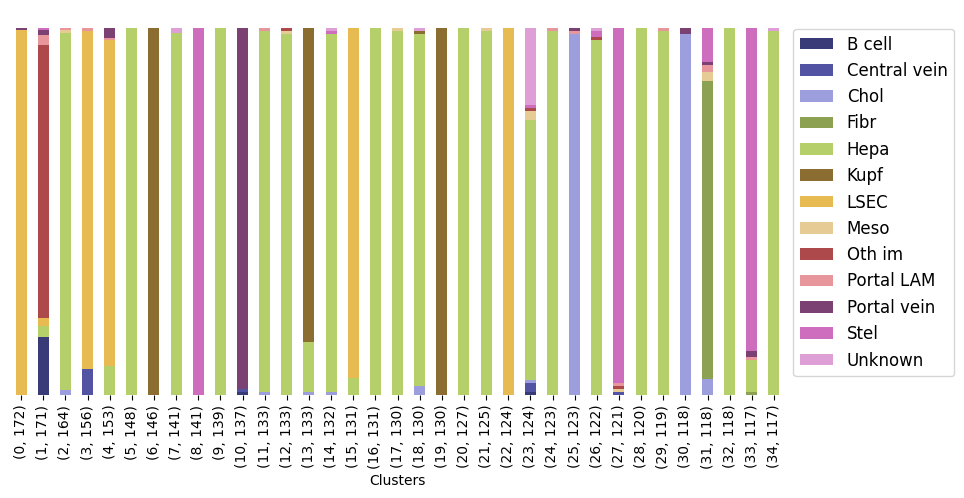

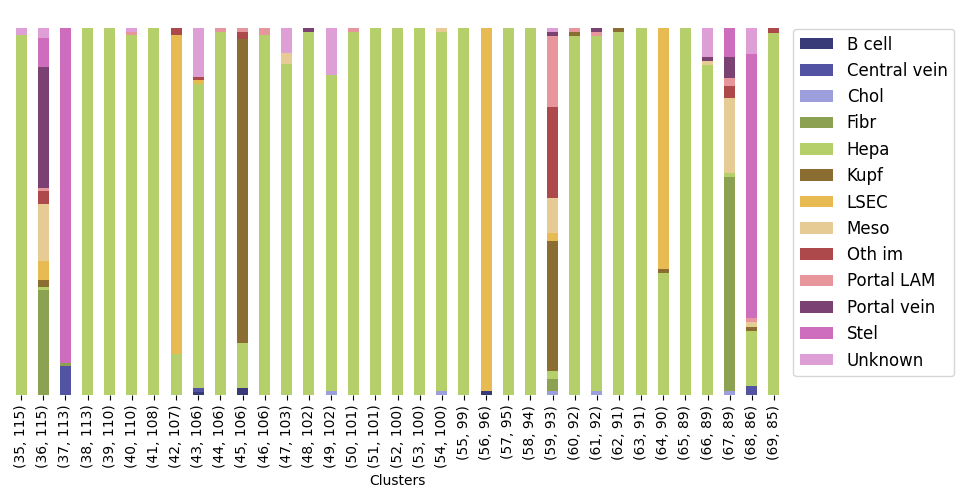

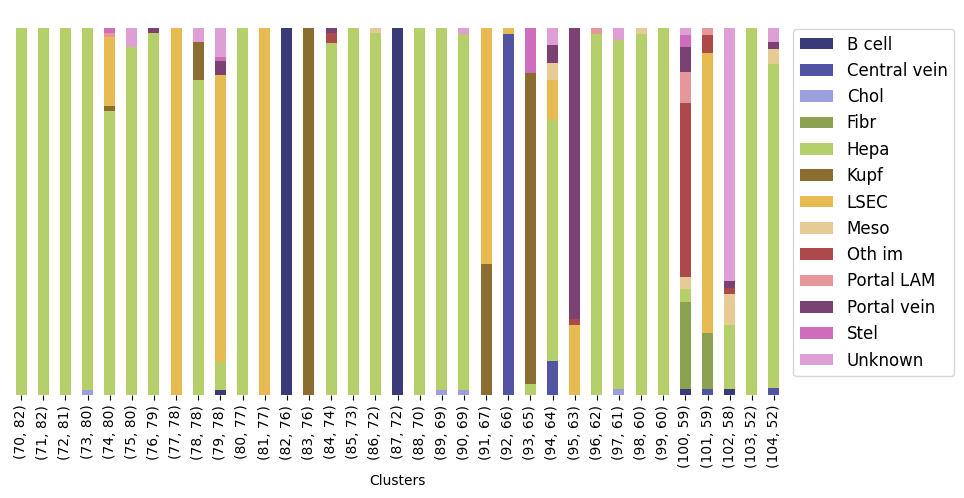

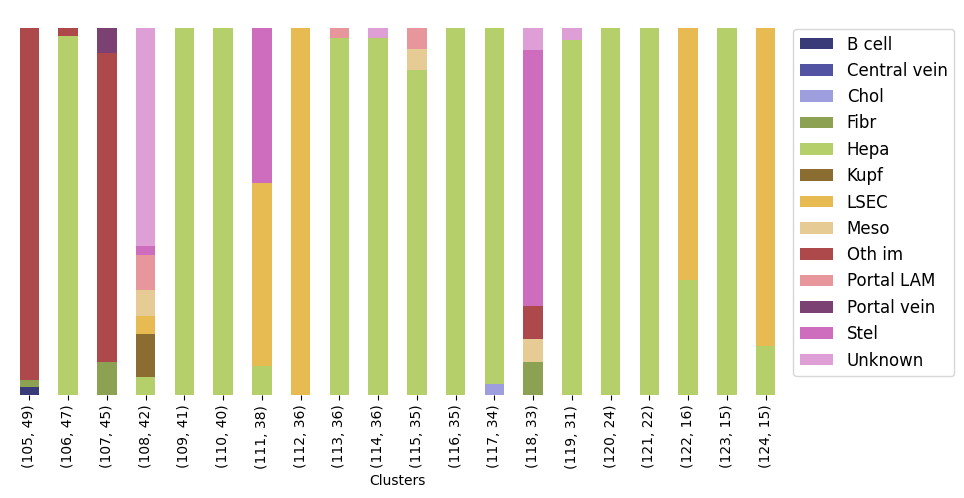

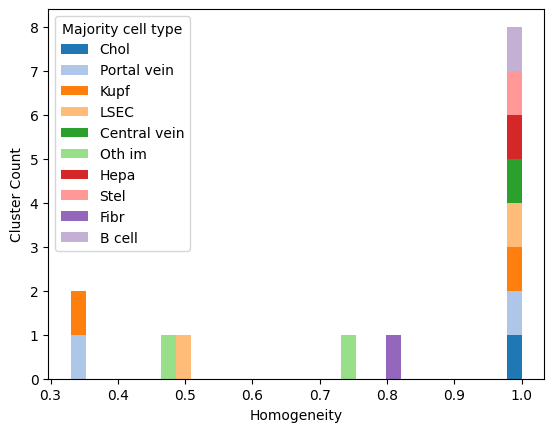

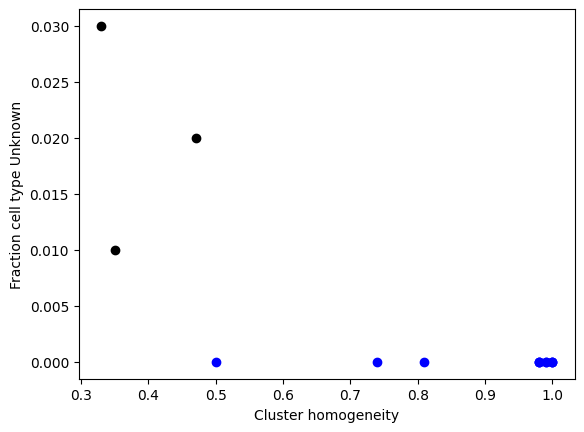

In [13]:
miniLeiden = clusteringVSleiden(anndata,'annotation_own_score_genes_Atlas_Scores_12','leiden')